# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 10

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [ ]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

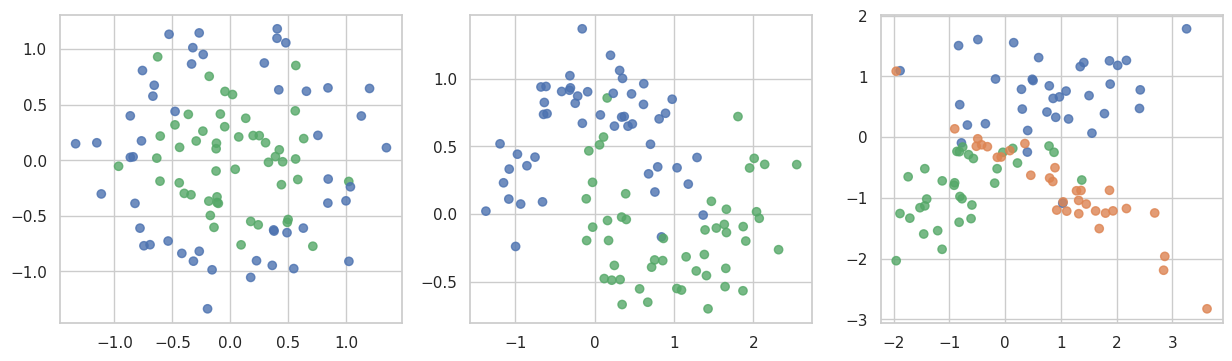

In [ ]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [ ]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

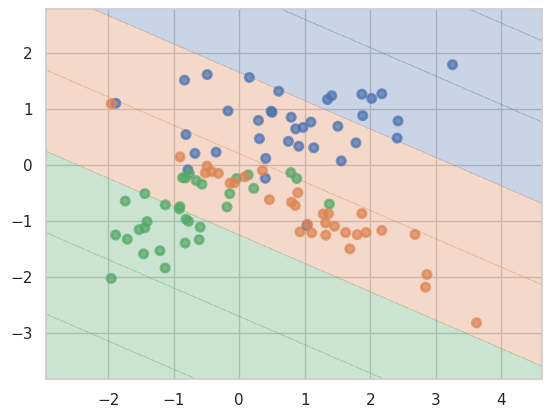

In [ ]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

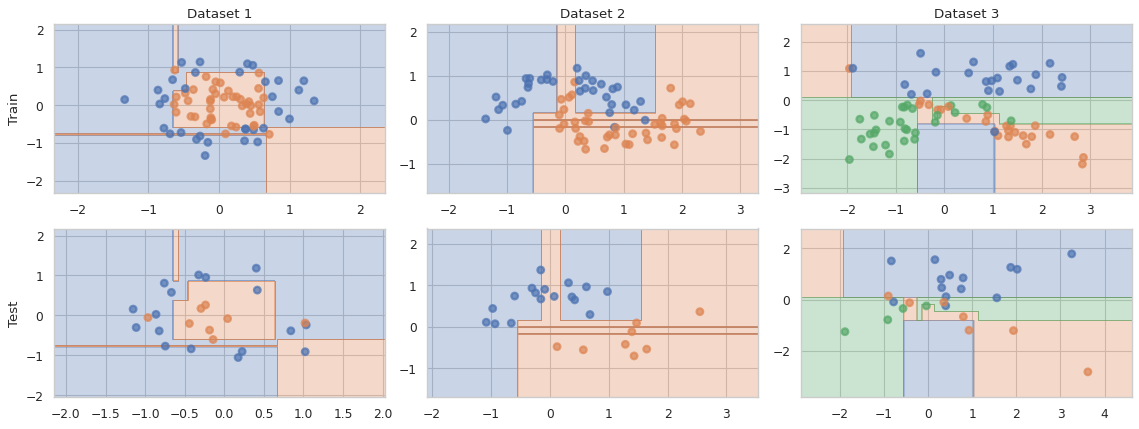

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

plt.figure(figsize=(15, 6), dpi=80)
train_accs = []
test_accs = []

for i in range(len(datasets)):
  X, y = datasets[i]
  plt.subplot(2, 3, i + 1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
  plt.title("Dataset " + str(i + 1))
  plot_surface(clf, X_train, y_train)
  if not i:
    plt.ylabel("Train")
  plt.subplot(2, 3, 3 + i + 1)
  plot_surface(clf, X_test, y_test)
  if not i:
    plt.ylabel("Test")
  train_accs.append(accuracy_score(y_train, clf.predict(X_train)))
  test_accs.append(accuracy_score(y_test, clf.predict(X_test)))

In [ ]:
print("Train accuracies", train_accs)
print("Test accuracies", test_accs)

Train accuracies [1.0, 1.0, 1.0]
Test accuracies [0.76, 0.92, 0.72]


__Ответ:__ ошибка на трэине нулевая, что сигнализирует о переобученности сильной, также видим её на графиках

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Train accuracies [0.8933333333333333, 0.9066666666666666, 0.8933333333333333]
Test accuracies [0.68, 1.0, 0.8]


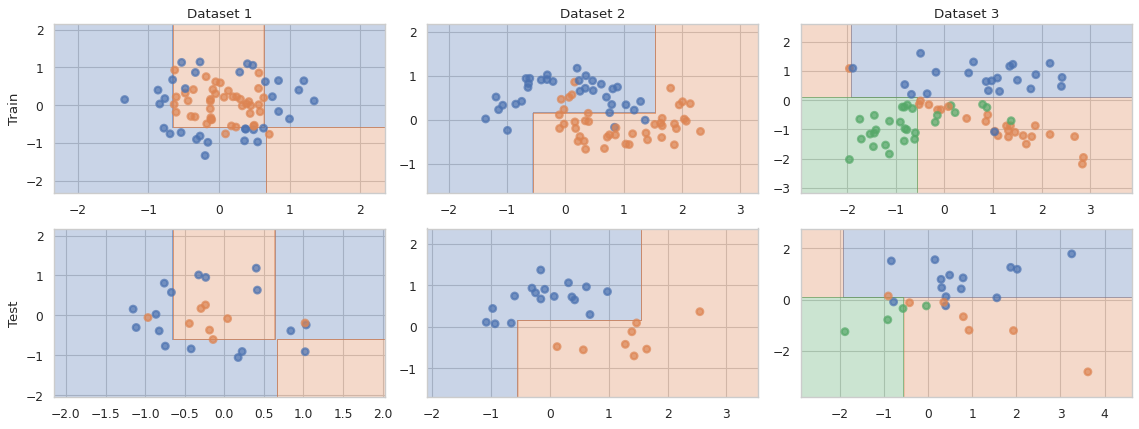

In [ ]:
plt.figure(figsize=(15, 6), dpi=80)
train_accs = []
test_accs = []

for i in range(len(datasets)):
  X, y = datasets[i]
  plt.subplot(2, 3, i + 1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  clf = tree.DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
  plt.title("Dataset " + str(i + 1))
  plot_surface(clf, X_train, y_train)
  if not i:
    plt.ylabel("Train")
  plt.subplot(2, 3, 3 + i + 1)
  plot_surface(clf, X_test, y_test)
  if not i:
    plt.ylabel("Test")
  train_accs.append(accuracy_score(y_train, clf.predict(X_train)))
  test_accs.append(accuracy_score(y_test, clf.predict(X_test)))

print("Train accuracies", train_accs)
print("Test accuracies", test_accs)

Train accuracies [0.9733333333333334, 0.9866666666666667, 0.92]
Test accuracies [0.76, 0.92, 0.72]


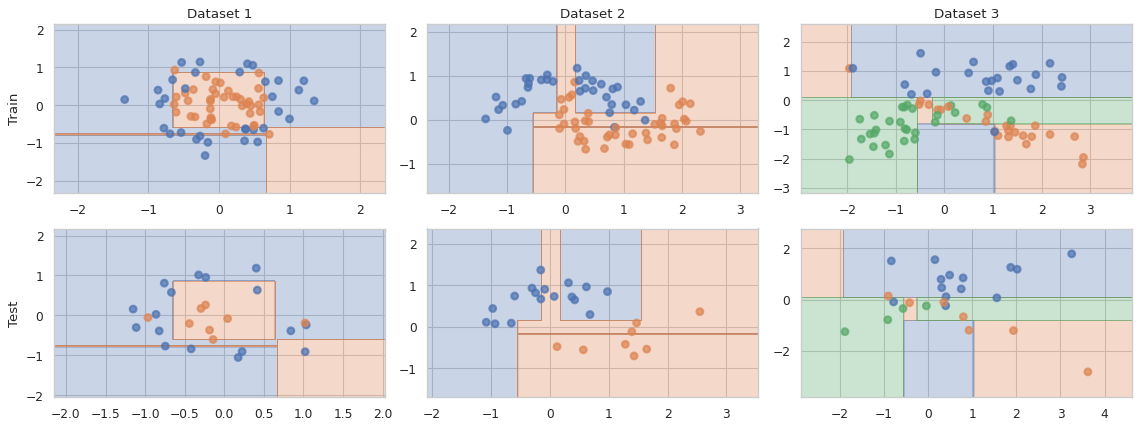

In [ ]:
plt.figure(figsize=(15, 6), dpi=80)
train_accs = []
test_accs = []

for i in range(len(datasets)):
  X, y = datasets[i]
  plt.subplot(2, 3, i + 1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  clf = tree.DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
  plt.title("Dataset " + str(i + 1))
  plot_surface(clf, X_train, y_train)
  if not i:
    plt.ylabel("Train")
  plt.subplot(2, 3, 3 + i + 1)
  plot_surface(clf, X_test, y_test)
  if not i:
    plt.ylabel("Test")
  train_accs.append(accuracy_score(y_train, clf.predict(X_train)))
  test_accs.append(accuracy_score(y_test, clf.predict(X_test)))

print("Train accuracies", train_accs)
print("Test accuracies", test_accs)

Train accuracies [0.9866666666666667, 0.9866666666666667, 0.9333333333333333]
Test accuracies [0.72, 0.92, 0.72]


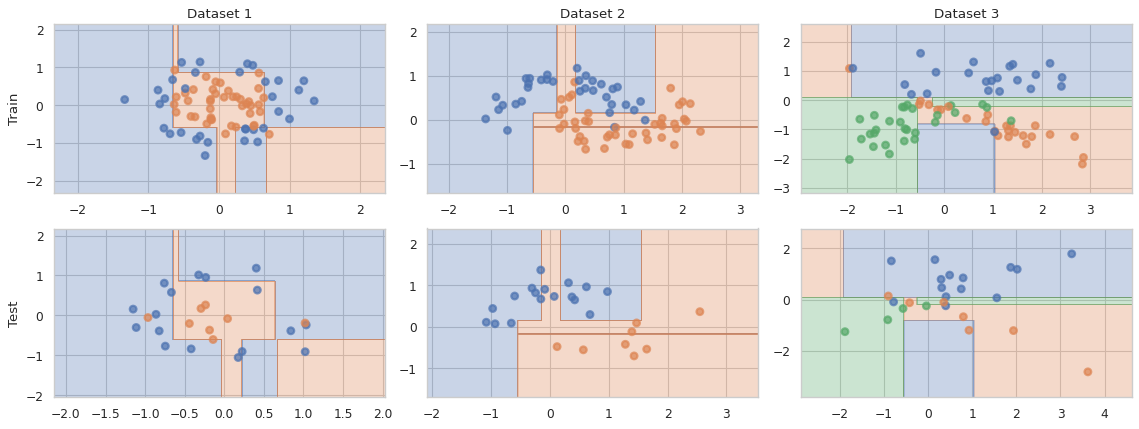

In [ ]:
plt.figure(figsize=(15, 6), dpi=80)
train_accs = []
test_accs = []

for i in range(len(datasets)):
  X, y = datasets[i]
  plt.subplot(2, 3, i + 1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  clf = tree.DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
  plt.title("Dataset " + str(i + 1))
  plot_surface(clf, X_train, y_train)
  if not i:
    plt.ylabel("Train")
  plt.subplot(2, 3, 3 + i + 1)
  plot_surface(clf, X_test, y_test)
  if not i:
    plt.ylabel("Test")
  train_accs.append(accuracy_score(y_train, clf.predict(X_train)))
  test_accs.append(accuracy_score(y_test, clf.predict(X_test)))

print("Train accuracies", train_accs)
print("Test accuracies", test_accs)

Train accuracies [0.96, 0.9733333333333334, 0.92]
Test accuracies [0.76, 0.88, 0.8]


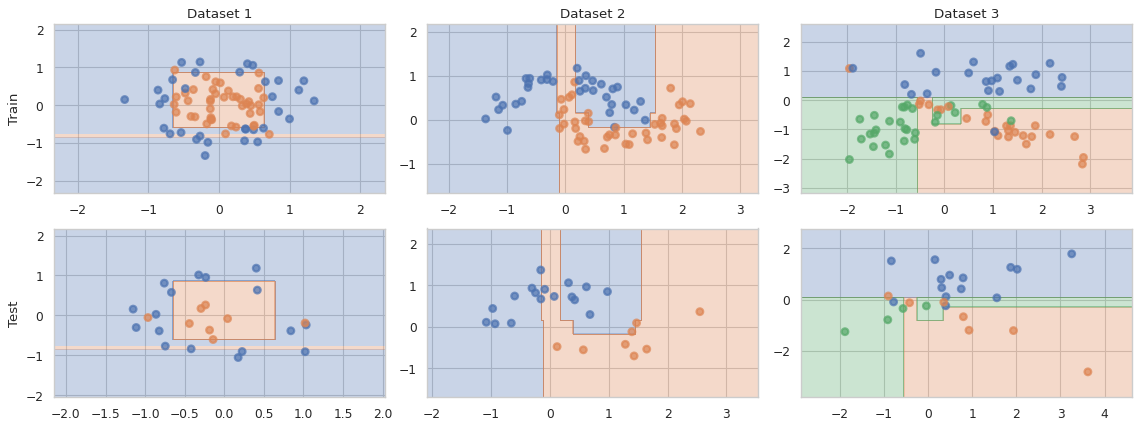

In [ ]:
plt.figure(figsize=(15, 6), dpi=80)
train_accs = []
test_accs = []

for i in range(len(datasets)):
  X, y = datasets[i]
  plt.subplot(2, 3, i + 1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  clf = tree.DecisionTreeClassifier(min_samples_leaf=3).fit(X_train, y_train)
  plt.title("Dataset " + str(i + 1))
  plot_surface(clf, X_train, y_train)
  if not i:
    plt.ylabel("Train")
  plt.subplot(2, 3, 3 + i + 1)
  plot_surface(clf, X_test, y_test)
  if not i:
    plt.ylabel("Test")
  train_accs.append(accuracy_score(y_train, clf.predict(X_train)))
  test_accs.append(accuracy_score(y_test, clf.predict(X_test)))

print("Train accuracies", train_accs)
print("Test accuracies", test_accs)

Train accuracies [0.9466666666666667, 0.9466666666666667, 0.9333333333333333]
Test accuracies [0.84, 0.92, 0.76]


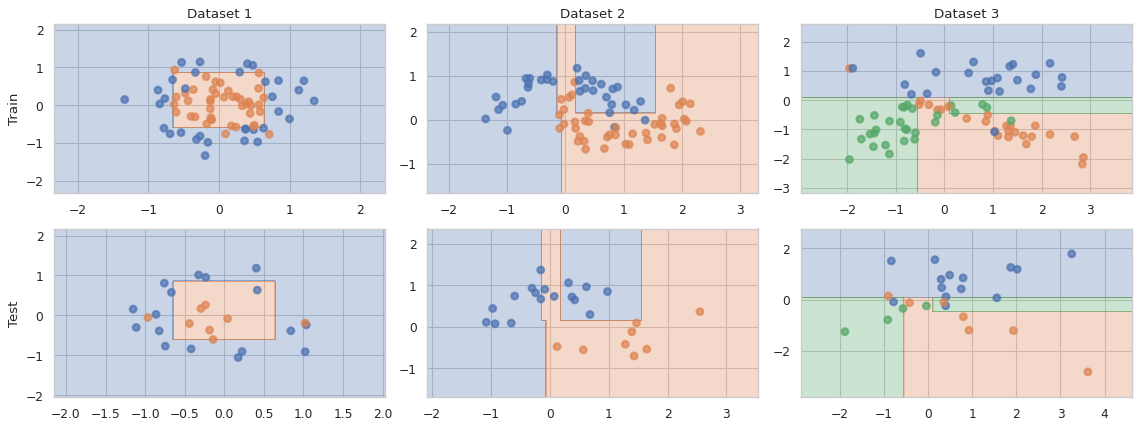

In [ ]:
plt.figure(figsize=(15, 6), dpi=80)
train_accs = []
test_accs = []

for i in range(len(datasets)):
  X, y = datasets[i]
  plt.subplot(2, 3, i + 1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  clf = tree.DecisionTreeClassifier(min_samples_leaf=4).fit(X_train, y_train)
  plt.title("Dataset " + str(i + 1))
  plot_surface(clf, X_train, y_train)
  if not i:
    plt.ylabel("Train")
  plt.subplot(2, 3, 3 + i + 1)
  plot_surface(clf, X_test, y_test)
  if not i:
    plt.ylabel("Test")
  train_accs.append(accuracy_score(y_train, clf.predict(X_train)))
  test_accs.append(accuracy_score(y_test, clf.predict(X_test)))

print("Train accuracies", train_accs)
print("Test accuracies", test_accs)

Train accuracies [0.9466666666666667, 0.9333333333333333, 0.9066666666666666]
Test accuracies [0.84, 0.8, 0.72]


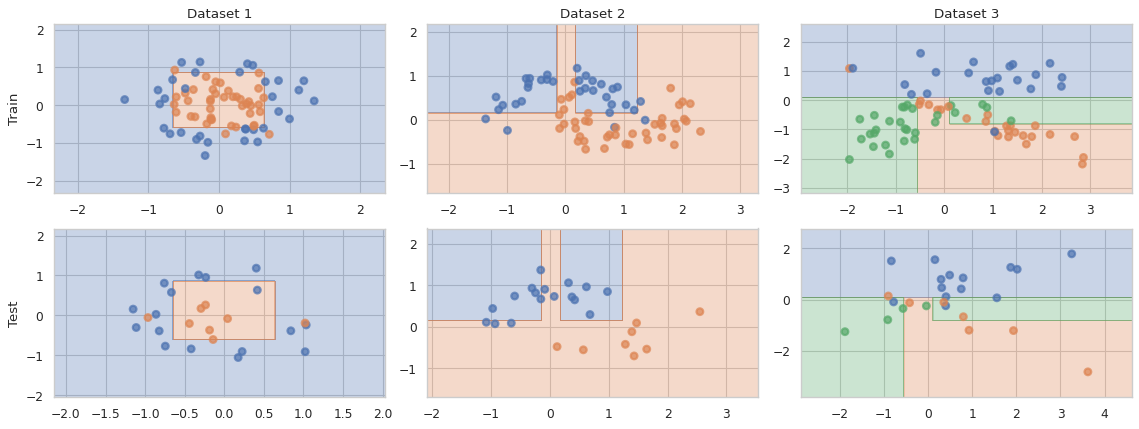

In [ ]:
plt.figure(figsize=(15, 6), dpi=80)
train_accs = []
test_accs = []

for i in range(len(datasets)):
  X, y = datasets[i]
  plt.subplot(2, 3, i + 1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  clf = tree.DecisionTreeClassifier(min_samples_leaf=5).fit(X_train, y_train)
  plt.title("Dataset " + str(i + 1))
  plot_surface(clf, X_train, y_train)
  if not i:
    plt.ylabel("Train")
  plt.subplot(2, 3, 3 + i + 1)
  plot_surface(clf, X_test, y_test)
  if not i:
    plt.ylabel("Test")
  train_accs.append(accuracy_score(y_train, clf.predict(X_train)))
  test_accs.append(accuracy_score(y_test, clf.predict(X_test)))

print("Train accuracies", train_accs)
print("Test accuracies", test_accs)

Train accuracies [0.9466666666666667, 0.9466666666666667, 0.9066666666666666]
Test accuracies [0.84, 0.92, 0.72]


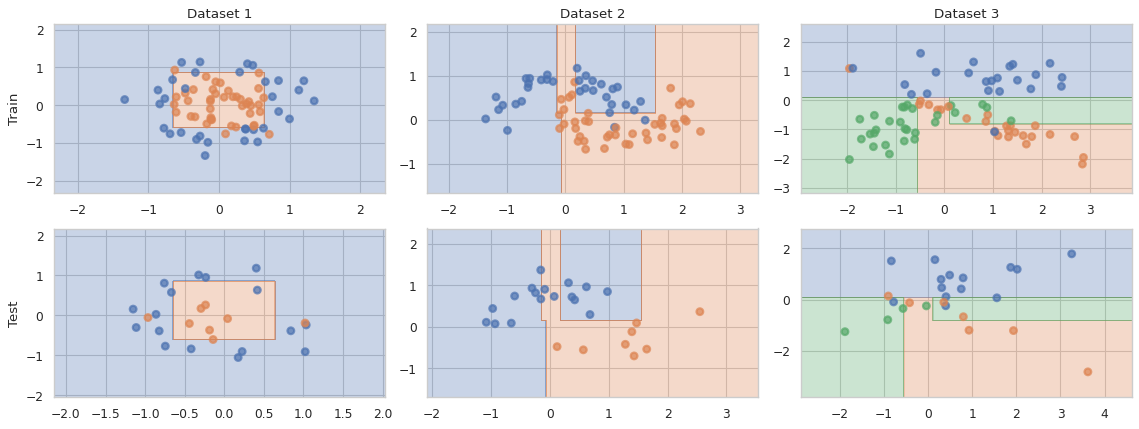

In [ ]:
plt.figure(figsize=(15, 6), dpi=80)
train_accs = []
test_accs = []

for i in range(len(datasets)):
  X, y = datasets[i]
  plt.subplot(2, 3, i + 1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  clf = tree.DecisionTreeClassifier(min_samples_leaf=4, max_depth=4).fit(X_train, y_train)
  plt.title("Dataset " + str(i + 1))
  plot_surface(clf, X_train, y_train)
  if not i:
    plt.ylabel("Train")
  plt.subplot(2, 3, 3 + i + 1)
  plot_surface(clf, X_test, y_test)
  if not i:
    plt.ylabel("Test")
  train_accs.append(accuracy_score(y_train, clf.predict(X_train)))
  test_accs.append(accuracy_score(y_test, clf.predict(X_test)))

print("Train accuracies", train_accs)
print("Test accuracies", test_accs)

__Ответ:__ Выбрали максимальную глубину и минимальное число элементов в листе перебором по accuracy на тесте, скомбинировав получили чуть меньше, чем при просто минимальном числе элементов равным 4, но зато получили осмысленные зоны, что говорит об уменьшении переобучения

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

https://contest.yandex.ru/contest/56884/problems/?success=102346950#6937501/2023_11_28/VZCZpqRrdg

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [ ]:
students = pd.read_csv('students.csv')


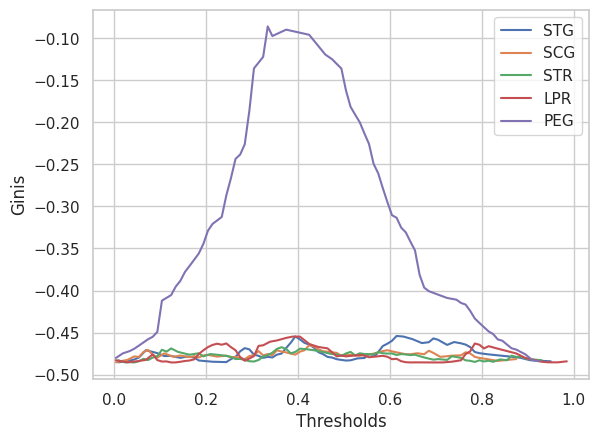

In [ ]:
def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    idx = np.argsort(feature_vector)
    features = feature_vector[idx]
    targets = target_vector[idx]

    unique_feats, feat_counts = np.unique(features, return_counts=True)
    thresholds = (unique_feats[:-1] + unique_feats[1:]) / 2

    R = len(targets)
    R_l = np.arange(1, R)
    R_r = R - R_l
    pos_cnt = np.sum(targets)
    pos_cnt_l = np.cumsum(targets)[:-1]
    pos_cnt_r = pos_cnt - pos_cnt_l

    p_1_l = pos_cnt_l / R_l
    p_0_l = 1 - p_1_l
    p_1_r = pos_cnt_r / R_r
    p_0_r = 1 - p_1_r

    H_l = 1 - p_1_l**2 - p_0_l**2
    H_r = 1 - p_1_r**2 - p_0_r**2
    ginis = -(R_l / R * H_l + R_r / R * H_r)[np.cumsum(feat_counts)[:-1] - 1]
    return thresholds, ginis, thresholds[np.argmax(ginis)], np.max(ginis)


feature_cnt = len(students.columns) - 1
for i in range(feature_cnt):
  col = students.columns[i]
  thresholds, ginis, _, _ = find_best_split(students[col].to_numpy(), students['UNS'].to_numpy())
  sns.lineplot(x = thresholds, y = ginis, label = col).set(ylabel='Ginis', xlabel='Thresholds')

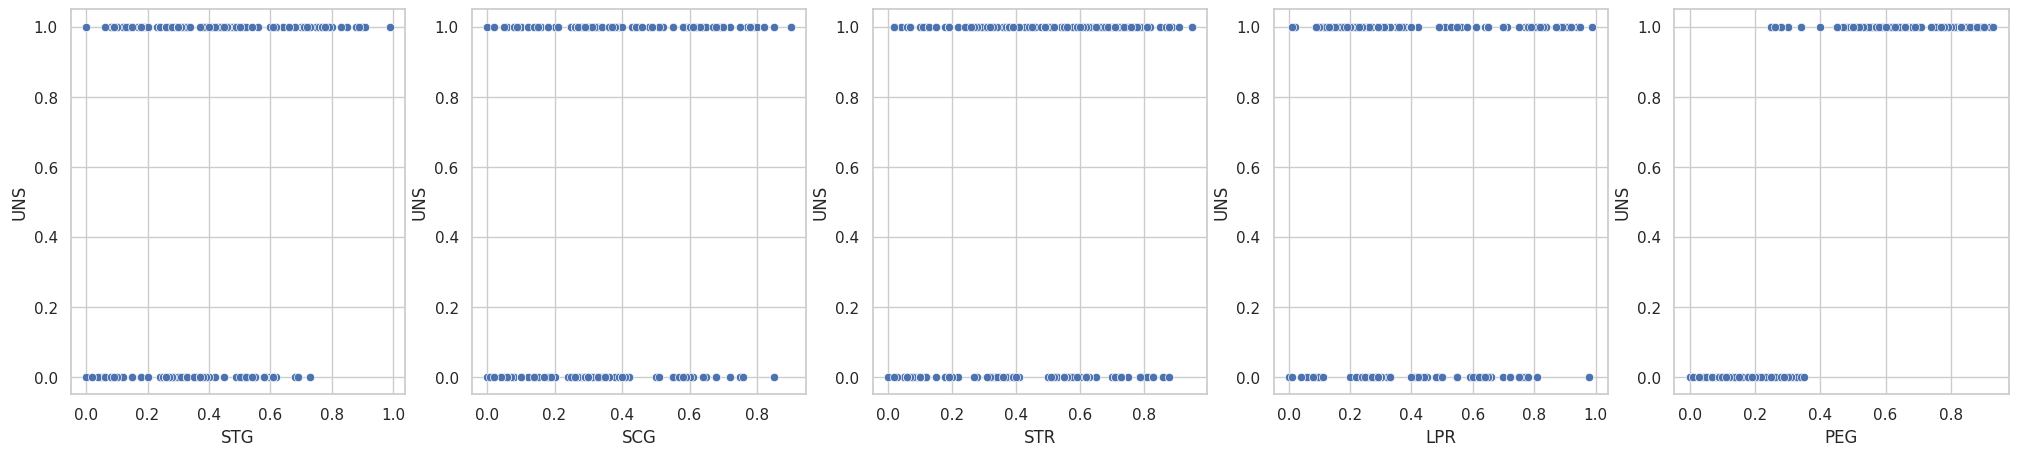

In [ ]:
f, ax = plt.subplots(1, 5, figsize=(25, 5))

for i in range(feature_cnt):
  sns.scatterplot(data=students, x=students.columns[i], y='UNS', ax=ax[i])


__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** нужно произвести деление выборки по признаку PEG при значении порога около 0.4, так как там находится оптимальное значение критерия Gini среди всех признаков. Смотря, на scatterplot можно увидеть, что у первых 4 признаков распределение таргета почти равномерное, то есть эти признаки почти не скоррелированны. А у признака PEG отчетливо видны два блока, по которому хорошо делится выборка на две части (по порогу 0.4).

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

 https://contest.yandex.ru/contest/56884/problems/B/?success=102360684#6937501/2023_11_29/C7K7xxHDvC

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [ ]:
mushrooms = pd.read_csv('agaricus-lepiota.data')

In [71]:
from sklearn.preprocessing import LabelEncoder
from hw5code import DecisionTree
from sklearn.metrics import accuracy_score

new_mushrooms = pd.DataFrame()
label_enc = LabelEncoder()
for col in mushrooms.columns:
  mushrooms[col] = label_enc.fit_transform(mushrooms[col])

X = mushrooms.drop(columns=['p'])
y = mushrooms.p

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

clf = DecisionTree(['real']*22)
clf.fit(np.array(X_train), np.array(y_train))
print(accuracy_score(y_test, clf.predict(np.array(X_test))))

1.0


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [69]:
datasets = []

data = pd.read_csv('agaricus-lepiota.data')
data = data.replace({'p': {'p' : 1, 'e': 0}})
datasets.append((data.drop(columns=['p']).apply(LabelEncoder().fit_transform), data['p']))

data = pd.read_csv('tic-tac-toe-endgame.csv')
data = data.replace({'V10': {'positive' : 1, 'negative': 0}})
datasets.append((data.drop(columns=['V10']).apply(LabelEncoder().fit_transform), data['V10']))

data = pd.read_csv('car.data')
data = data.replace({'unacc': {'unacc': 0, 'acc': 0, 'good' : 1, 'vgood': 1}})
datasets.append((data.drop(columns=['unacc']).apply(LabelEncoder().fit_transform), data['unacc']))

data = pd.read_csv('nursery.data')
data = data.replace({'recommend': {'not_recom': 0, 'recommend' : 0, 'very_recom': 1, 'priority': 1, 'spec_prior': 1}})
datasets.append((data.drop(columns=['recommend']).apply(LabelEncoder().fit_transform), data['recommend']))

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder

names = ['Mushroom', 'Tic-Tac', 'Cars', 'Nursery']
accs = [[], [], [], []]
for X, y in datasets:
    clf = DecisionTree(['real'] * X.shape[1])
    accs[0].append(cross_val_score(clf, np.array(X), np.array(y), scoring=make_scorer(accuracy_score), cv=10).mean())

for X, y in datasets:
    clf = DecisionTree(['categorical'] * X.shape[1])
    accs[1].append(cross_val_score(clf, np.array(X), np.array(y), scoring=make_scorer(accuracy_score), cv=10).mean())

ohe = OneHotEncoder(sparse=False)
for X, y in datasets:
    ohe_X = ohe.fit_transform(X)
    clf = DecisionTree(['real'] * ohe_X.shape[1])
    accs[2].append(cross_val_score(clf, np.array(ohe_X), np.array(y), scoring=make_scorer(accuracy_score), cv=10).mean())

for X, y in datasets:
    clf = DecisionTreeClassifier()
    accs[3].append(cross_val_score(clf, np.array(X), np.array(y), scoring=make_scorer(accuracy_score), cv=10).mean())

In [74]:
pd.DataFrame(np.array(accs), columns=names, index=['Real', 'Categorical', 'Real+OHE', 'SKLearn'])

,Mushroom,Tic-Tac,Cars,Nursery
Real,0.999261,0.467533,0.942600,0.999846
Categorical,1.000000,0.541458,0.967519,0.999923
Real+OHE,0.999631,0.543575,0.921767,0.999769
SKLearn,0.958290,0.759156,0.944952,0.999846


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента.
Одинаково ли для разных наборов данных ранжируются алгоритмы?
Порассуждайте, почему так происходит.

Обратите внимание на значение признаков в разных наборах данных.
Присутствует ли в результатах какая-то компонента случайности?
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** Нет, не одинаково, лучший алгоритм для трёх датасетов из четырёх тот, который считает все признаки категориальными, но есть и датастет ТТ, на котором оптимальное качество достигается на sklearn реализации, предположу, что так происходит из-за большого количества выбросов (то есть случайности) в этом датасете, поэтому у дерева не получается предсказывать хорошо везде. С точки зрения теории мы знаем, что оптимальным алгоритмом будет тот, что считает признаки категориальными, при условии хороших данных, что ещё раз подтверждает проблему в данных в датасете ТТ. Возможно, чтобы получить лучший результат стоит очистить обучающую выборку от выбросов. Также стоит попробовать сбалансировать классы, добавив новые данные с таргетом negative.

Вставьте что угодно, описывающее ваши впечатления от этого задания:

Клёвая домашка, без бессонных ночей))